# Report and code for IAF-604 project - 02

Importing libraries to handle, process and analyse the data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

Reading both the datasets to understand which dataset is better for further classification.

In [3]:
data1 = pd.read_csv('nslkdd-version1.csv')
data2 = pd.read_csv('nslkdd-version2.csv')

#### What is the total number of observations in each dataset?  

In [4]:
print(' shape of dataset1',data1.shape,'\n','shape of dataset2',data2.shape)

 shape of dataset1 (25192, 42) 
 shape of dataset2 (25192, 36)


In [4]:
data1.head(5)

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a33,a34,a35,a36,a37,a38,a39,a40,a41,a42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [5]:
data2.head(5)

,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,...,a33,a34,a35,a36,a37,a38,a39,a40,a41,a42
0,0,0,0,0,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,0,0,0,0,0,0,1,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,0,0,0,0,0,0,1,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


#### List all the relevant statistical information about the dataset! In other words, compare these two datasets and document the similarities and the dissimilarities in these two datasets.

In [6]:
data1.describe() #stats of dataset 1

,a1,a5,a6,a7,a8,a9,a10,a11,a12,a13,...,a32,a33,a34,a35,a36,a37,a38,a39,a40,a41
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data2.describe()  #stats of dataset 2

,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,...,a33,a34,a35,a36,a37,a38,a39,a40,a41,a42
count,25192.000000,25192.000000,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,0.000079,0.023738,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,0.001548,...,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769,1.171364
std,0.008910,0.260221,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,0.039316,...,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333,2.222340
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,1.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [8]:
data1.isnull() #check null values of dataset 1

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a33,a34,a35,a36,a37,a38,a39,a40,a41,a42
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25188,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25189,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25190,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
data1.isnull().sum()

a1     0
a2     0
a3     0
a4     0
a5     0
a6     0
a7     0
a8     0
a9     0
a10    0
a11    0
a12    0
a13    0
a14    0
a15    0
a16    0
a17    0
a18    0
a19    0
a20    0
a21    0
a22    0
a23    0
a24    0
a25    0
a26    0
a27    0
a28    0
a29    0
a30    0
a31    0
a32    0
a33    0
a34    0
a35    0
a36    0
a37    0
a38    0
a39    0
a40    0
a41    0
a42    0
dtype: int64

In [10]:
data2.isnull() #check null values of dataset 2

,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,...,a33,a34,a35,a36,a37,a38,a39,a40,a41,a42
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25188,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25189,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
25190,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
data2.isnull().sum()

a7     0
a8     0
a9     0
a10    0
a11    0
a12    0
a13    0
a14    0
a15    0
a16    0
a17    0
a18    0
a19    0
a20    0
a21    0
a22    0
a23    0
a24    0
a25    0
a26    0
a27    0
a28    0
a29    0
a30    0
a31    0
a32    0
a33    0
a34    0
a35    0
a36    0
a37    0
a38    0
a39    0
a40    0
a41    0
a42    0
dtype: int64

#### Also, document the useful and not useful data characteristics in both datasets. Which one of these two datasets is useful to perform network traffic classification using random forest technique? Do you think this dataset needs further processing for cleaning, training, efficiency,…?

#### Similarities: 
- Both datasets have common columns from a7 to a42.
- Columns in both datasets have the same statistical properties
- two data sets have the same number of observations or cases

#### Dissimilarities:
- The two data sets have different dimensions. i.e they have different number of variables
- The two data sets are of different size.
- The column name a42 are of different, version 1 has string datatype and version 2 dataset has been encoded numerically.

#### Data characteristics:
In terms of volumne and variety both datasets are limited but, dataset 1 has more features which means benefits while training a model. value and variety of the data remains same in both datasets, we can understand by observing statistical data of both datasets(common columns). Both datasets have no null values/Nan's. But, most of the columns has '0' values which might be useful or not until we perform classification and understanding feature importance.

<i><b> In order to perform network traffic classification on the data set, it is optimal to use complete dataset i.e. dataset1. Therefore, version 1 having a more complete observation will be found more useful in the accurate classification of network traffic.</b></i>

<i><b> We have to pre-process this data for further analysis. It is important for us to transform all string variables to numeric data types that our random classifier can training. Therefore in order to train the model, there may be need for further processing. For efficiency we can remove or adjust features accordingly. </b>

***

### Then apply random forest technique to classify the traffic types and extract variables of importance. 
Performing random forest model from sklearn library for dataset 1.

In [12]:
data1.dtypes

a1       int64
a2      object
a3      object
a4      object
a5       int64
a6       int64
a7       int64
a8       int64
a9       int64
a10      int64
a11      int64
a12      int64
a13      int64
a14      int64
a15      int64
a16      int64
a17      int64
a18      int64
a19      int64
a20      int64
a21      int64
a22      int64
a23      int64
a24      int64
a25    float64
a26    float64
a27    float64
a28    float64
a29    float64
a30    float64
a31    float64
a32      int64
a33      int64
a34    float64
a35    float64
a36    float64
a37    float64
a38    float64
a39    float64
a40    float64
a41    float64
a42     object
dtype: object

Encoded numerical values to string typed columns

In [13]:
label = preprocessing.LabelEncoder()
data1["a2"] = label.fit_transform(data1["a2"])
data1["a3"] = label.fit_transform(data1["a3"])
data1["a4"] = label.fit_transform(data1["a4"])
data1["a42"] = label.fit_transform(data1["a42"])

label column

In [14]:
y = data1.iloc[:,41]
y

0        11
1        11
2         9
3        11
4        11
         ..
25187     9
25188    20
25189     9
25190     9
25191     9
Name: a42, Length: 25192, dtype: int32

train/test columns

In [15]:
X = data1.iloc[:,:40]
X

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a31,a32,a33,a34,a35,a36,a37,a38,a39,a40
0,0,1,19,9,491,0,0,0,0,0,...,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05
1,0,2,41,9,146,0,0,0,0,0,...,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00
2,0,1,46,5,0,0,0,0,0,0,...,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00
3,0,1,22,9,232,8153,0,0,0,0,...,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00
4,0,1,22,9,199,420,0,0,0,0,...,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,1,16,2,0,0,0,0,0,0,...,0.00,255,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00
25188,0,1,19,9,334,0,0,0,0,0,...,0.00,1,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00
25189,0,1,46,1,0,0,0,0,0,0,...,0.00,255,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00
25190,0,1,38,5,0,0,0,0,0,0,...,0.00,255,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00


In [16]:
tmp = np.array(X)
X1 = tmp[:,0:41] 
Y1 = np.array(y)
# Machine learning with 80:20
# Split the data into 80:20
row, col = X.shape
TR = round(row*0.8)
TT = row-TR
# Training with 80% data
X1_train = X1[0:TR-1,:]
Y1_train = Y1[0:TR-1]

We are taking randomclassifier from skleran.metrics library. which has n-estimator, This is the number of trees you wish to construct before using maximum voting or prediction averages. While having a larger number of trees improves efficiency, it also slows down your code.

In [17]:
rF = RandomForestClassifier(random_state=0, n_estimators=1000, oob_score=True, n_jobs=-1)
model = rF.fit(X1_train,Y1_train)

### (For variable importance, in python there is a way to select the important features—plot it as a histogram). It means the random forest algorithm provides the variable list with an order of importance for the classification accuracy that was achieved.
Listing features according to theri importance. Also ploting the histogram of these features.

1. feature 5 (0.135336)
2. feature 29 (0.096357)
3. feature 4 (0.075013)
4. feature 30 (0.074948)
5. feature 39 (0.048864)
6. feature 6 (0.047298)
7. feature 23 (0.043720)
8. feature 38 (0.043473)
9. feature 25 (0.042263)
10. feature 34 (0.038218)
11. feature 36 (0.037724)
12. feature 35 (0.036891)
13. feature 26 (0.035682)
14. feature 2 (0.033995)
15. feature 37 (0.030115)
16. feature 33 (0.027591)
17. feature 24 (0.025071)
18. feature 3 (0.021467)
19. feature 32 (0.020234)
20. feature 40 (0.018038)
21. feature 27 (0.014955)
22. feature 12 (0.011247)
23. feature 28 (0.009480)
24. feature 8 (0.009097)
25. feature 10 (0.007359)
26. feature 13 (0.004853)
27. feature 31 (0.004479)
28. feature 1 (0.004310)
29. feature 22 (0.000867)
30. feature 16 (0.000247)
31. feature 17 (0.000208)
32. feature 14 (0.000193)
33. feature 11 (0.000159)
34. feature 19 (0.000110)
35. feature 9 (0.000053)
36. feature 7 (0.000032)
37. feature 18 (0.000031)
38. feature 15 (0.000023)
39. feature 21 (0.000000)
40. 

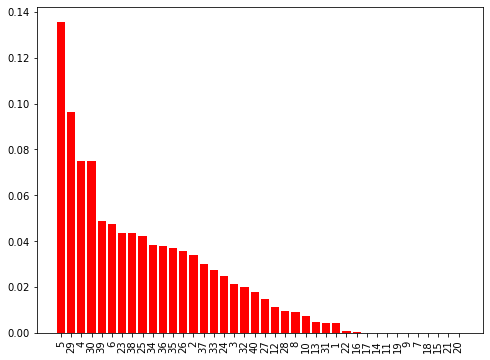

In [18]:
importance = model.feature_importances_
indices = importance.argsort()[::-1]
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f]+1, importance[indices[f]]))
plt.figure(figsize=(8, 6))
plt.bar(range(X.shape[1]), importance[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), indices+1, rotation=90)
plt.show()

Performance evaluation by:
- sklearn.metrics
- confusion matric
- out of bag estimate

In [19]:
# Testing with 20% data
X1_test = X1[TR:row,:]
y_test = Y1[TR:row]
yhat_test = rF.predict(X1_test)
in_accuracy = metrics.accuracy_score(y_test, yhat_test)
print("sklearn.metrics_Accuracy:",in_accuracy,'\n')
print(classification_report(y_test, yhat_test, labels=np.unique(data1['a42'])))
#confusion matrix
cm = confusion_matrix(y_test, yhat_test)
print("Confusion matrix:\n%s" % cm)
model.oob_score_

sklearn.metrics_Accuracy: 0.9974196109567288 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1
           5       1.00      0.99      0.99       152
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00      1648
          10       0.98      1.00      0.99        61
          11       1.00      1.00      1.00      2675
          12       0.00      0.00      0.00         0
          13       1.00      1.00      1.00         8
          14       1.00      0.99      1.00       127
          15       0.00      0.00      0.00         0
          16       0.99      0.97 

0.9966754329380241

In [20]:
indices = indices+1
indices

array([ 5, 29,  4, 30, 39,  6, 23, 38, 25, 34, 36, 35, 26,  2, 37, 33, 24,
        3, 32, 40, 27, 12, 28,  8, 10, 13, 31,  1, 22, 16, 17, 14, 11, 19,
        9,  7, 18, 15, 21, 20], dtype=int64)

### As the next step, by eliminating one feature at a time, from the least important to the most important, get accuracies for the random forest and use them to decide how much dimensionality reduction can be achieved. In other words, find the subset of features (subspace) that gives similar accuracy as the entire feature space.

Stopping condition: <i> As we have overall accuracy of 0.99, if we perform feature reduction cannot be less than 0.98.</i><br>
<b> Removing least important feature one at time and applying classification using random classifier and printing accuracy.</b>

In [21]:
temp = data1.copy()
temp.drop(columns = 'a42',inplace = True)
elim = []
for i in indices[::-1]:
    elim.append(i)
    temp.drop(columns = 'a%s'%str(i),inplace = True)
    tmp = np.array(temp)
    #print(tmp.shape)
    y=data1['a42']
    X1 = tmp
    Y1 = np.array(y)
    row, col = X.shape
    TR = round(row*0.8)
    TT = row-TR
    X1_train = X1[0:TR-1,:]
    Y1_train = Y1[0:TR-1]
    rF = RandomForestClassifier(random_state=0, n_estimators=1000, oob_score=True, n_jobs=-1)
    model = rF.fit(X1_train,Y1_train)
    X1_test = X1[TR:row,:]
    y_test = Y1[TR:row]
    yhat_test = rF.predict(X1_test)
    accuracy = metrics.accuracy_score(y_test, yhat_test)
    print(len(elim),'.',"Accuracy:", accuracy, 'after removing:', elim)
    if(accuracy < 0.98):
        print('Accuracy:', accuracy)
        break

1 . Accuracy: 0.9972211194918619 after removing: [20]
2 . Accuracy: 0.9972211194918619 after removing: [20, 21]
3 . Accuracy: 0.9972211194918619 after removing: [20, 21, 15]
4 . Accuracy: 0.9972211194918619 after removing: [20, 21, 15, 18]
5 . Accuracy: 0.9972211194918619 after removing: [20, 21, 15, 18, 7]
6 . Accuracy: 0.9972211194918619 after removing: [20, 21, 15, 18, 7, 9]
7 . Accuracy: 0.9972211194918619 after removing: [20, 21, 15, 18, 7, 9, 19]
8 . Accuracy: 0.9972211194918619 after removing: [20, 21, 15, 18, 7, 9, 19, 11]
9 . Accuracy: 0.9972211194918619 after removing: [20, 21, 15, 18, 7, 9, 19, 11, 14]
10 . Accuracy: 0.9972211194918619 after removing: [20, 21, 15, 18, 7, 9, 19, 11, 14, 17]
11 . Accuracy: 0.9972211194918619 after removing: [20, 21, 15, 18, 7, 9, 19, 11, 14, 17, 16]
12 . Accuracy: 0.9972211194918619 after removing: [20, 21, 15, 18, 7, 9, 19, 11, 14, 17, 16, 22]
13 . Accuracy: 0.9970226280269948 after removing: [20, 21, 15, 18, 7, 9, 19, 11, 14, 17, 16, 22, 1]


-  case1: After removing features: [20, 21, 15, 18, 7, 9, 19, 11, 14, 17, 16, 22, 1, 31, 13, 10, 8] there is there is significant loss in accuracy = 0.9970226280269948. 
- case 2: Again after removing features [20, 21, 15, 18, 7, 9, 19, 11, 14, 17, 16, 22, 1, 31, 13, 10, 8, 28, 12, 27, 40] accuracy (0.9972211194918619) remained same but, this might lead to missclassification.

#### so, we will continue with features after removing [20, 21, 15, 18, 7, 9, 19, 11, 14, 17, 16, 22, 1, 31, 13, 10], this is just before case-1.

Dimenstionality resuced till 16 features removal, but accuracy remains almost same.

In [22]:
fet = data1[['a2', 'a3', 'a4', 'a5', 'a6', 'a8', 'a12', 'a23', 'a24', 'a25', 'a26', 'a27', 'a28', 'a29', 'a30', 'a32', 'a33', 'a34', 'a35', 'a36', 'a37', 'a38', 'a39', 'a40', 'a41']]
tmp = np.array(fet)
y=data1['a42']
X1 = tmp
Y1 = np.array(y)
row, col = X.shape
TR = round(row*0.8)
TT = row-TR
X1_train = X1[0:TR-1,:]
Y1_train = Y1[0:TR-1]
rF = RandomForestClassifier(random_state=0, n_estimators=1000, oob_score=True, n_jobs=-1)
model = rF.fit(X1_train,Y1_train)
X1_test = X1[TR:row,:]
y_test = Y1[TR:row]
yhat_test = rF.predict(X1_test)
accuracy = metrics.accuracy_score(y_test, yhat_test)

### Use quantitative measures (accuracy, sensitivity, specificity, etc.). Also, use misclassification and out-of-bag errors as measures to interpret and discuss the results.  

As label column is of multiclass, we cannot generate sklearn sensitivity, specificity. But, can be interpreted by confusion matric and also generated a classification report to understand the performance of the model.

In [23]:
print('sklearn.metrics_Accuracy',accuracy,'\n') #sklearn.metrics accuracy
cm = confusion_matrix(y_test, yhat_test) #confusion matrix
print(classification_report(y_test, yhat_test, labels=np.unique(data1['a42'])))
print("Confusion matrix:\n%s" % cm)
model.oob_score_ #out of bag errors

sklearn.metrics_Accuracy 0.9970226280269948 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1
           5       1.00      0.99      0.99       152
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00      1648
          10       0.98      1.00      0.99        61
          11       1.00      1.00      1.00      2675
          12       0.00      0.00      0.00         0
          13       1.00      1.00      1.00         8
          14       1.00      0.98      0.99       127
          15       0.00      0.00      0.00         0
          16       0.99      0.97  

0.9967250533419342

# Conclusion
After removing certain features and traing the random classifier on remaining subset of features, the following assertion could me made:

- From the above confusion matrix above, we were able to maximize the TP(true positives) and TN(true negative) values and minimize both the FP(false positives) and FN(false negative). The result shows a model with a good classification results.
- The accuracy of the random forest model is given as 99.7% which is almost same when calculated with the out of bag samples. Hence, we have truely gotten an optimal model for the data set.
- The final model contains variables with high importance.
- The 17 x 17 confusion matrix shows an extremely small amount of misclassification.

References: 
- Big Data Scalability, Machine Learning Models and Algorithms for Big Data Classification – Shan Suthahara